**Proposal:**

One of the major problems in statistical modeling is to deal with imbalanced datasets that has an Inherent Imbalanced class distribution. In the majority of use-cases involving *Bio-medical, Finance, Oil and gas industry* which have problem statements like *Detection of cancer cells, Fraudulent credit card transaction or Detection of Oil spills* are cases when the occurrence of an event are rare instances. **The primary goal of a machine learning algorithm is to successfully classify these rare instances into their respective classes.**



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

import warnings
warnings.filterwarnings('ignore') #I do not want to show warning messages 

In [2]:
# data import
df = pd.read_csv('/Users/thientrangbui/Google Drive/Kaggle competion/Credit Card Fraud Detection/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Scaling and Distributing**

In [3]:
#scale time and amount

from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [4]:
# Amount and Time are Scaled!
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [4]:
#change the order of DataFrame columns
df = df[['scaled_amount', 'scaled_time','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
         'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
         'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class']]

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


**Splitting the Data (Original DataFrame)**

Before processing the imbalanced data problem by dealing with the method of random under or over sampling, we should split data into the training and testing set separately.

I recall here from our previous notebook, ^.- 

Why? for testing purposes, remember although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, **we want to test our models on the original testing set not on the testing set created by either of these techniques**. 

The main goal is to fit the model either with the dataframes that were undersample and oversample **in order for our models to detect the patterns**, and **test it on the original testing set**.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


**Imbalanced data problem**

When observation in one class is higher than the observation in other classes then there exists a imbalance class. The most problem with the Imbalance Class that machine learning algorithms work best when the number of samples in each class are about equal. 

Standard classifier algorithms like Decision Tree and Logistic Regression have a bias toward classes which have number of instances. They tend to only predict the majority class data. The features of the minority class are treated as noise and are often ignored. Thus, there is a high probability of misclassification of the minority class as compared to the majority class.

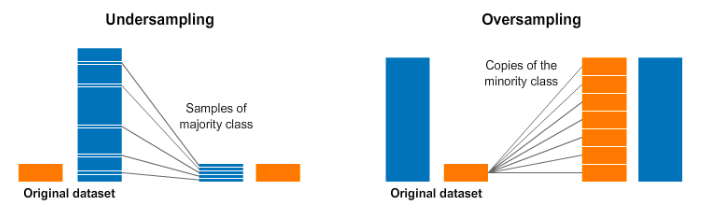

In [6]:
from IPython.display import Image

Image(filename = "under-over-sampling.png", width = 600, height = 300)


* Advantages and disadvatages of under-sampling:

Advantages: It can help improve run time and storage problems by reducing the number of training data samples when the training data set is huge.

Disadvantages: It can discard potentially useful information which could be important for building rule classifiers. 

The sample chosen by random under-sampling may be a biased sample. And it will not be an accurate representation of the population. Thereby, resulting in inaccurate results with the actual test data set.

* Advantages and Disadvantage of over-sampling 

Advantages : Unlike under-sampling, this method leads to no information loss.

Disadvantages : It increases the likelihood of overfitting since it replicates the minority class events.

**Common Mistakes from Imbalanced Datasets:**

We often do a mistake that we over/under-sampling randomly a whole dataset before splitting into the training and testing sets. 

But, we should never test on the oversampled or undersampled dataset. If we want to implement cross validation, remember to oversample or undersample your training data during cross-validation, not before. Don't use accuracy score as a metric with imbalanced datasets (will be usually high and misleading), instead use f1-score, precision/recall score or confusion matrix.



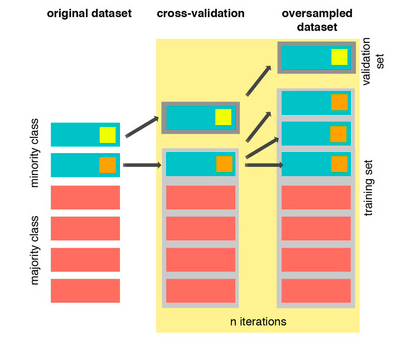

In [13]:
Image(filename = "over-under_sampling_cross.png", width = 500, height = 200)

As you see above, an example of the random over-sampling occurs *during* cross validation and not *prior* to the cross validation process. Synthetic data are created only for the training set without affecting the validation set.

**Techniques of the random over/under sampling**

Now we present below the random oversapmling and undersapling techniques which were already built in Python as following:

* Oversampling techniques SMOTE, ADASYN

* Undersampling techniques Tomek Links, ENN

and

* Hybridized Sampling.

We consider paralel the code and the classifying results for each above method. Let's start!!!

**Oversampling techniques SMOTE, ADASYN**

**SMOTE - Synthetic Sampling Method for Imbalanced Data**

* Ideas: SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.

* SMOTE uses only the minority class to train the KNN. 

The multiple of the miority class is presented as the following pic,

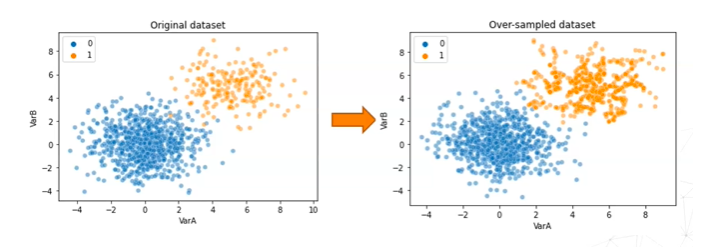

In [4]:
Image(filename = "SMOTE.png", width = 600, height = 300)

Example:

from imblearn.over_sampling import SMOTE

method = SMOTE(sampling_strategy="minority")

x_res, y_res = method.fit_resample(x_train, y_train)


from imblearn.over_sampling import SMOTE

method = SMOTE()

x_res, y_res = method.fit_resample(x_train, y_train)

In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix

def test_eval(choosen_model, X_test, y_test, sampling=None):
    
    # Prediction on the testing set
    y_prob=choosen_model.predict_proba(X_test)
    y_pred=choosen_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred),"\n")
    
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))

In [15]:
#for instance, we run the model of LGBM with SMOTE

from imblearn.over_sampling import SMOTE

method = SMOTE()
x_res, y_res = method.fit_resample(x_train, y_train) #resampling

from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(x_res, y_res)

print('='*60)
print ("SMOTE")
print('='*60)
test_eval(model, x_test, y_test, "SMOTE")

SMOTE
Confusion Matrix
[[56796    68]
 [   13    85]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.56      0.87      0.68        98

    accuracy                           1.00     56962
   macro avg       0.78      0.93      0.84     56962
weighted avg       1.00      1.00      1.00     56962
 

AUC-ROC
0.9816502747694464


**ADASYN - Synthetic Minority Oversampling Technique Adaptive**

* The major difference between SMOTE and ADASYN is the difference in the generation of synthetic sample points for minority data points. In ADASYN, it generates more synthetic data from samples in the minority class, that are harder to classify and less synthetic data where it's less harder to classify, whereas in SMOTE, there is a uniform weight for all minority points.

* ADASYN creates more samples that are closer to the majority class, as they are harder to classify

Example:

from imblearn.over_sampling import ADASYN

method = ADASYN()

x_res, y_res = method.fit_resample(x_train, y_train)

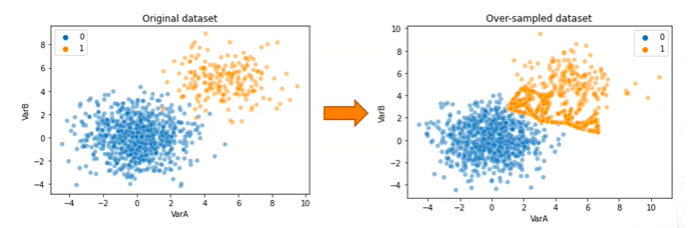

In [16]:
Image(filename = "Adasyn_oversampling.png", width = 600, height = 300)

In [17]:
#for instance, we run the model of LGBM with ADASYN

from imblearn.over_sampling import ADASYN

method = ADASYN()
x_res, y_res = method.fit_resample(x_train, y_train) #resampling

from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(x_res, y_res)

print('='*60)
print ("ADASYN")
print('='*60)
test_eval(model, x_test, y_test, "ADASYN")

ADASYN
Confusion Matrix
[[56754   110]
 [   14    84]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.43      0.86      0.58        98

    accuracy                           1.00     56962
   macro avg       0.72      0.93      0.79     56962
weighted avg       1.00      1.00      1.00     56962
 

AUC-ROC
0.9676336594007329


**Undersampling techniques Tomek Links, ENN**

**Tomek links**

* Tomek links are pairs of very close instances but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

* Tomek’s link exists if the two samples are the nearest neighbors of each other

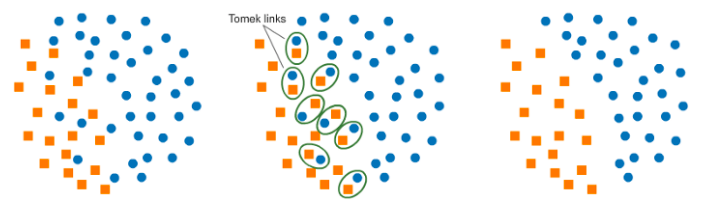

In [18]:
Image(filename = "tomek_links.png", width = 600, height = 300)

Example:

from imblearn.under_sampling import TomekLinks

method = TomekLinks()

x_res, y_res = method.fit_resample(x_train, y_train)

In [20]:
# apply
#for instance, we run the model of LGBM with Tomek Links

from imblearn.under_sampling import TomekLinks

method = TomekLinks()
x_res, y_res = method.fit_resample(x_train, y_train) #resampling

from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(x_res, y_res)

print('='*60)
print ("Tomek Links")
print('='*60)
test_eval(model, x_test, y_test, "Tomek Links")

Tomek Links
Confusion Matrix
[[56705   159]
 [   76    22]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.12      0.22      0.16        98

    accuracy                           1.00     56962
   macro avg       0.56      0.61      0.58     56962
weighted avg       1.00      1.00      1.00     56962
 

AUC-ROC
0.3675139143305043


**ENN - Edited Nearest Neighbor**

* Just like Tomek, Edited Nearest Neighbor removes any example whose class label differs from the class of at least two of its three nearest neighbors. The ENN method removes the instances of the majority class whose prediction made by KNN method is different from the majority class. 

* ENN method can remove both the noisy examples as borderline examples, providing a smoother decision surface. 

* ENN tends to remove more examples than the Tomek links does, so it is expected that it will provide a more in depth data cleaning

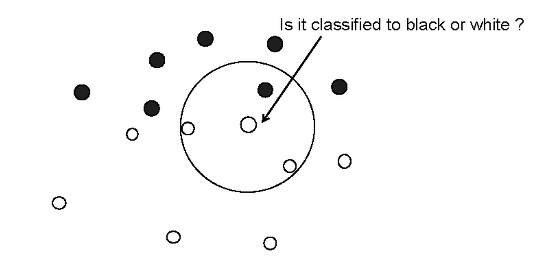

In [21]:
Image(filename = "ENN.png", width = 600, height = 300)

Example:

from imblearn.under_sampling import EditedNearestNeighbours

method = EditedNearestNeighbours()

x_res, y_res = method.fit_resample(x_train, y_train)

In [22]:
#for instance, we run the model of LGBM with Tomek Links

from imblearn.under_sampling import EditedNearestNeighbours

method = EditedNearestNeighbours()
x_res, y_res = method.fit_resample(x_train, y_train) #resampling

from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(x_res, y_res)

print('='*60)
print ("ENN")
print('='*60)
test_eval(model, x_test, y_test, "ENN")

ENN
Confusion Matrix
[[56726   138]
 [   26    72]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.34      0.73      0.47        98

    accuracy                           1.00     56962
   macro avg       0.67      0.87      0.73     56962
weighted avg       1.00      1.00      1.00     56962
 

AUC-ROC
0.8481615282578985


**Hybridized Sampling**

Ideas: *Both oversampling and undersampling have their strengths and drawbacks. So, a hybrid sampling procedure was proposed that uses a combination of two sampling techniques to create a balanced data set. By using more than one sampling technique, we can combine the strengths of the individual techniques while lessening the drawbacks.*

* The hybrid techniques that aims to clean overlapping data points for each of the classes distributed in sample space.

* After the oversampling is done by SMOTE, the class clusters may be invading each other’s space. As a result, the classifier model will be overfitting.

* So, in order to get better class clusters, Tomek links / ENN are applied to oversampled minority class samples done by SMOTE.Thus instead of removing the observations only from the majority class, we generally remove both the class observations.

**SMOTE + Tomek links**

from imblearn.combine import SMOTETomek

method = SMOTETomek()

x_res, y_res = method.fit_resample(x_train, y_train)


**SMOTE + ENN**

from imblearn.combine import SMOTEENN

method = SMOTEENN(sampling_strategy="minority", n_jobs= -1)

x_res, y_res = method.fit_resample(x_train, y_train)

In [9]:
#for instance, we run the model of LGBM with SMOTE and Tomek links

from imblearn.combine import SMOTETomek

method = SMOTETomek()
x_res, y_res = method.fit_resample(x_train, y_train) #resampling

from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(x_res, y_res)

print('='*60)
print ("SMOTETomek")
print('='*60)
test_eval(model, x_test, y_test, "SMOTETomek")

SMOTETomek
Confusion Matrix
[[56798    66]
 [   11    87]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.57      0.89      0.69        98

    accuracy                           1.00     56962
   macro avg       0.78      0.94      0.85     56962
weighted avg       1.00      1.00      1.00     56962
 

AUC-ROC
0.988169050681612


In [10]:
#for instance, we run the model of LGBM with SMOTE and Tomek links

from imblearn.combine import SMOTEENN

method = SMOTEENN(sampling_strategy="minority", n_jobs= -1)
x_res, y_res = method.fit_resample(x_train, y_train) #resampling

from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(x_res, y_res)

print('='*60)
print ("SMOTEENN")
print('='*60)
test_eval(model, x_test, y_test, "SMOTEENN")

SMOTEENN
Confusion Matrix
[[56783    81]
 [   12    86]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.51      0.88      0.65        98

    accuracy                           1.00     56962
   macro avg       0.76      0.94      0.82     56962
weighted avg       1.00      1.00      1.00     56962
 

AUC-ROC
0.9885238176587461


**Comparing**

Now we try to put all results of these above resampling methods to compare them. 



In [5]:
def test_eval(clf_model, X_test, y_test, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
          
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))
    resample.append(sampling)

In [12]:
resample = list()
precision = list()
recall = list()
F1score = list()
AUCROC = list()

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix

from lightgbm import LGBMClassifier

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import TomekLinks, EditedNearestNeighbours
from imblearn.combine import SMOTEENN, SMOTETomek

sampling_methods = {"SMOTE" : SMOTE(),
                    "ADASYN" : ADASYN(),
                    "TomekLinks" : TomekLinks(),
                    "ENN" : EditedNearestNeighbours(),
                    "SMOTEENN" : SMOTEENN(),
                    "SMOTETomek" : SMOTETomek()
                   }
for sampling_method in sampling_methods:
    
    method = sampling_methods[sampling_method]
    x_res, y_res = method.fit_resample(x_train, y_train)   
    
    model = LGBMClassifier()
    model.fit(x_res, y_res)
    
    print('='*60)
    print (sampling_method)
    print('='*60)
    test_eval(model, x_test, y_test, sampling_method)
    

SMOTE
Confusion Matrix
[[56800    64]
 [   12    86]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.57      0.88      0.69        98

    accuracy                           1.00     56962
   macro avg       0.79      0.94      0.85     56962
weighted avg       1.00      1.00      1.00     56962
 

AUC-ROC
0.9795356697828258
ADASYN
Confusion Matrix
[[56750   114]
 [   11    87]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.43      0.89      0.58        98

    accuracy                           1.00     56962
   macro avg       0.72      0.94      0.79     56962
weighted avg       1.00      1.00      1.00     56962
 

AUC-ROC
0.9909848453309292
TomekLinks
Confusion Matrix
[[56705   159]
 [   76    22]] 

Classification Report
              precision    recall  f1-score   su

In [17]:
clf_eval_df = pd.DataFrame({'resample':resample,
                            'precision':precision,
                            'recall':recall,
                            'f1-score':F1score,
                            'AUC-ROC':AUCROC})
clf_eval_df

,resample,precision,recall,f1-score,AUC-ROC
0,SMOTE,0.573333,0.877551,0.693548,0.979536
1,ADASYN,0.432836,0.887755,0.581940,0.990985
2,TomekLinks,0.121547,0.224490,0.157706,0.367514
3,ENN,0.342857,0.734694,0.467532,0.848162
4,SMOTEENN,0.551282,0.877551,0.677165,0.990324
5,SMOTETomek,0.522013,0.846939,0.645914,0.958717


In [18]:
Resample = ['Oversampling','Oversampling','Undersampling','Undersampling','Hybridized Sampling','Hybridized Sampling']

clf_eval_df["Type resampling"] = Resample

clf_eval_df

,resample,precision,recall,f1-score,AUC-ROC,Type resampling
0,SMOTE,0.573333,0.877551,0.693548,0.979536,Oversampling
1,ADASYN,0.432836,0.887755,0.581940,0.990985,Oversampling
2,TomekLinks,0.121547,0.224490,0.157706,0.367514,Undersampling
3,ENN,0.342857,0.734694,0.467532,0.848162,Undersampling
4,SMOTEENN,0.551282,0.877551,0.677165,0.990324,Hybridized Sampling
5,SMOTETomek,0.522013,0.846939,0.645914,0.958717,Hybridized Sampling


**CATBOOST model in classification**

Replacing LGBM model, we consider CATBOOST model corresponding with different resampling techniques.

What's CATBOOST?

The term CatBoost is an acronym that stands for "Category” and “Boosting.” 

According to the CatBoost documentation, CatBoost supports numerical, categorical, and text features but has a good handling technique for categorical data. 

The CatBoost algorithm has quite a number of parameters to tune the features in the processing stage.

"Boosting" in CatBoost refers to the gradient boosting machine learning. Gradient boosting is a machine learning technique for regression and classification problems. 

Which produces a prediction model in an ensemble of weak prediction models, typically decision trees. 

Gradient boosting is a robust machine learning algorithm that performs well when used to provide solutions to different types of business problems such as

* Fraud detection, 
* Recommendation system, 
* Forecasting.

Again, it can return an outstanding result with relatively fewer data. Unlike other machine learning algorithms that only perform well after learning from extensive data.

From the results of LGBM classification model, we are recommended to address following resampling methods: SMOTE, ADASYN, SMOTEENN and SMOTETomek.

In [6]:
resample = list()
precision = list()
recall = list()
F1score = list()
AUCROC = list()

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix

from catboost import CatBoostClassifier

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek

sampling_methods = {"SMOTE" : SMOTE(),
                    "ADASYN" : ADASYN(),
                    "SMOTEENN" : SMOTEENN(),
                    "SMOTETomek" : SMOTETomek()
                   }
for sampling_method in sampling_methods:
    
    method = sampling_methods[sampling_method]
    x_res, y_res = method.fit_resample(x_train, y_train)   
    
    model = CatBoostClassifier(verbose=False)
    model.fit(x_res, y_res)
    
    print('='*60)
    print (sampling_method)
    print('='*60)
    test_eval(model, x_test, y_test, sampling_method)

SMOTE
Confusion Matrix
[[56818    46]
 [   13    85]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.65      0.87      0.74        98

    accuracy                           1.00     56962
   macro avg       0.82      0.93      0.87     56962
weighted avg       1.00      1.00      1.00     56962
 

AUC-ROC
0.9778099267281476
ADASYN
Confusion Matrix
[[56813    51]
 [   13    85]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.62      0.87      0.73        98

    accuracy                           1.00     56962
   macro avg       0.81      0.93      0.86     56962
weighted avg       1.00      1.00      1.00     56962
 

AUC-ROC
0.984579210834587
SMOTEENN
Confusion Matrix
[[56806    58]
 [   12    86]] 

Classification Report
              precision    recall  f1-score   suppo

In [11]:
clf_eval_df = pd.DataFrame({'resample':resample,
                            'precision':precision,
                            'recall':recall,
                            'f1-score':F1score,
                            'AUC-ROC':AUCROC})
Resample = ['Oversampling','Oversampling','Hybridized Sampling','Hybridized Sampling']

clf_eval_df["Type resampling"] = Resample

clf_eval_df = clf_eval_df[['Type resampling','resample','precision','recall','f1-score','AUC-ROC']]

clf_eval_df

,Type resampling,resample,precision,recall,f1-score,AUC-ROC
0,Oversampling,SMOTE,0.648855,0.867347,0.742358,0.977810
1,Oversampling,ADASYN,0.625000,0.867347,0.726496,0.984579
2,Hybridized Sampling,SMOTEENN,0.597222,0.877551,0.710744,0.980738
3,Hybridized Sampling,SMOTETomek,0.641791,0.877551,0.741379,0.978024


* From the two classification models, we have an global wiew in dealing with the imbalanced data in the classification problem. However, depending on each specific problem, I think that we can not conclude which method is the best choice for resampling an imbalanced dataset. 

* For instance, in this practical example of credit card fraud detection, we see that the oversampling and hybridized sampling are quite fixed with the problem, showed in the confusion matrix. However, we can not say that under-sampling is worse method, it depends on each specific problem. So to know which method will be most fixed with our dataset, why not to try each resampling method to take a look before we choose the best ones. As a data scientist, the most difficult things are having a good database concerning to cleaning and preparing an enough good dataset and try again and again diverse methods before going to the conclusion of which method or models being fixed and predicted well the problem. 

* Well, thank you for your reading and I am happy to discover new things with you also. Hope that this notebook can help you in somehow. See u at the next notebook! ^_^